NO 1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

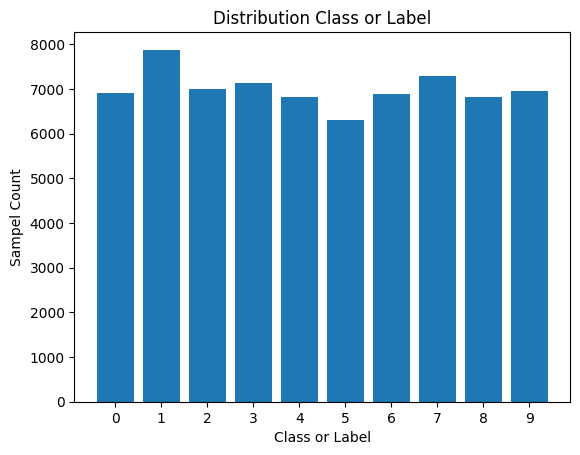

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

unique_labels, label_counts = np.unique(mnist.target, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Class or Label')
plt.ylabel('Sampel Count')
plt.title('Distribution Class or Label')
plt.xticks(unique_labels)
plt.show()


In [5]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Data Count for Label {i}: {label_counts[i]}")

Data Count for Label 0: 6903
Data Count for Label 1: 7877
Data Count for Label 2: 6990
Data Count for Label 3: 7141
Data Count for Label 4: 6824
Data Count for Label 5: 6313
Data Count for Label 6: 6876
Data Count for Label 7: 7293
Data Count for Label 8: 6825
Data Count for Label 9: 6958


NO 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat
menggunakan referensi dari Job Sheet 03.


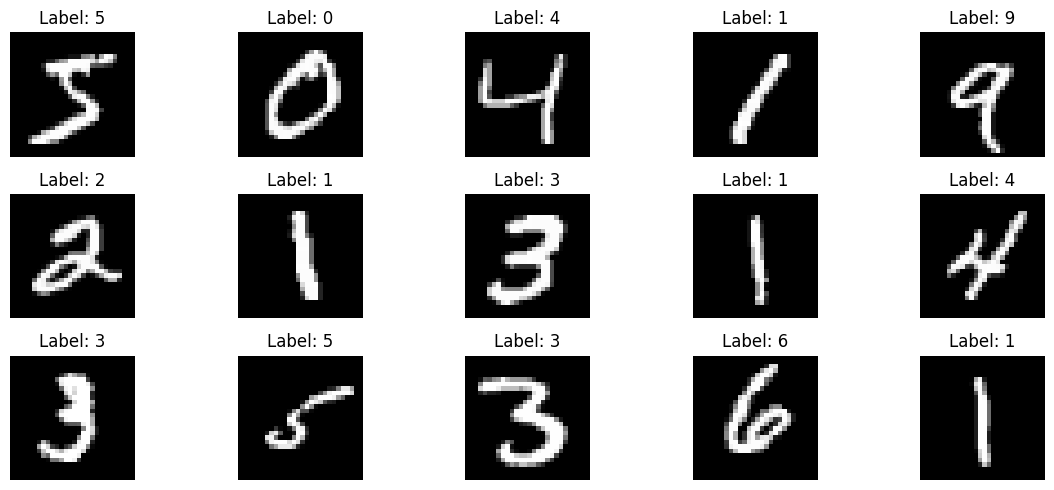

In [7]:
# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

NO 3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

a. Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
fitur.

b. Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.


In [8]:
from sklearn.decomposition import PCA

# Menentukan jumlah komponen utama yang diinginkan
n_components = 50  # Misalnya, kita akan menggunakan 50 komponen utama

# Melakukan PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Sekarang, X_pca berisi data yang telah dikurangi dimensinya menggunakan PCA
print("Shape of X_pca:", X_pca.shape)

Shape of X_pca: (70000, 50)


NO 4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.


In [9]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 70% data pelatihan dan 30% data pengujian
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train1))
print("Data Test Count:", len(X_test1))

Data Train Count: 49000
Data Test Count: 21000


In [10]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 80% data pelatihan dan 20% data pengujian
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train2))
print("Data Test Count:", len(X_test2))

Data Train Count: 56000
Data Test Count: 14000


In [11]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 90% data pelatihan dan 10% data pengujian
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train3))
print("Data Test Count:", len(X_test3))

Data Train Count: 63000
Data Test Count: 7000


NO 5.  Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.

a. Anda diperbolehkan untuk melakukan tunning parameter.

b. Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Membuat model Naive Bayes Gaussian
nb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train1, y_train1)

# Menguji model pada data pengujian
y_pred_nb1 = nb_model.predict(X_test1)

# Mengukur akurasi model Naive Bayes
accuracy_nb1 = accuracy_score(y_test1, y_pred_nb1)
print("Accuracy Naive Bayes:", accuracy_nb1)

Accuracy Naive Bayes: 0.8695714285714286


NO 6. Evaluasi model yang Anda buat terhadap data training dan data testing.

a. Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.

b. Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.

c. Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.


In [34]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=42)
X_train_selected = X_train[:, :50]
X_test_selected = X_test[:, :50]

nb_model = GaussianNB()

nb_model.fit(X_train_selected, y_train)
y_train_pred = nb_model.predict(X_train_selected)
y_test_pred = nb_model.predict(X_test_selected)


accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Akurasi pada data pelatihan:", accuracy_train)
print("Akurasi pada data pengujian:", accuracy_test)


Akurasi pada data pelatihan: 0.10661224489795919
Akurasi pada data pengujian: 0.11185714285714286


In [35]:
print("Classification Report pada data pelatihan:\n", classification_report(y_train, y_train_pred))
print("Classification Report pada data pengujian:\n", classification_report(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report pada data pelatihan:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4845
           1       0.00      0.00      0.00      5513
           2       1.00      0.00      0.00      4857
           3       0.00      0.00      0.00      4965
           4       0.00      0.00      0.00      4888
           5       0.00      0.00      0.00      4398
           6       0.90      0.04      0.07      4788
           7       0.10      1.00      0.19      5045
           8       0.00      0.00      0.00      4833
           9       0.00      0.00      0.00      4868

    accuracy                           0.11     49000
   macro avg       0.20      0.10      0.03     49000
weighted avg       0.20      0.11      0.03     49000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report pada data pengujian:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2058
           1       0.00      0.00      0.00      2364
           2       0.00      0.00      0.00      2133
           3       0.00      0.00      0.00      2176
           4       0.00      0.00      0.00      1936
           5       0.00      0.00      0.00      1915
           6       0.93      0.05      0.09      2088
           7       0.11      1.00      0.19      2248
           8       0.00      0.00      0.00      1992
           9       0.00      0.00      0.00      2090

    accuracy                           0.11     21000
   macro avg       0.10      0.10      0.03     21000
weighted avg       0.10      0.11      0.03     21000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix pada data pelatihan:\n", confusion_matrix_train)
print("Confusion Matrix pada data pengujian:\n", confusion_matrix_test)

Confusion Matrix pada data pelatihan:
 [[   0    0    0    0    0    0    0 4845    0    0]
 [   0    0    0    0    0    0    2 5511    0    0]
 [   0    0    1    0    0    0   16 4840    0    0]
 [   0    0    0    0    0    0    0 4965    0    0]
 [   0    0    0    0    0    0    1 4887    0    0]
 [   0    0    0    0    0    0    0 4398    0    0]
 [   0    0    0    0    0    0  178 4610    0    0]
 [   0    0    0    0    0    0    0 5045    0    0]
 [   0    0    0    0    0    0    0 4833    0    0]
 [   0    0    0    0    0    0    0 4868    0    0]]
Confusion Matrix pada data pengujian:
 [[   0    0    0    0    0    0    2 2056    0    0]
 [   0    0    0    0    0    0    0 2364    0    0]
 [   0    0    0    0    0    0    6 2127    0    0]
 [   0    0    0    0    0    0    0 2176    0    0]
 [   0    0    0    0    0    0    0 1936    0    0]
 [   0    0    0    0    0    0    0 1915    0    0]
 [   0    1    0    0    0    0  101 1986    0    0]
 [   0    0    0    

In [24]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 70% data pelatihan dan 30% data pengujian
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train1))
print("Data Test Count:", len(X_test1))



Data Train Count: 49000
Data Test Count: 21000


NO 7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet
03 sebagai acuan.

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Membuat model Naive Bayes Gaussian
nb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train1, y_train1)

# Menguji model pada data pengujian
y_pred_nb1 = nb_model.predict(X_test1)

# Mengukur akurasi model Naive Bayes
accuracy_nb1 = accuracy_score(y_test1, y_pred_nb1)
print("Accuracy Naive Bayes:", accuracy_nb1)



Accuracy Naive Bayes: 0.8695714285714286


In [14]:
# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train2, y_train2)

# Menguji model pada data pengujian
y_pred_nb2 = nb_model.predict(X_test2)

# Mengukur akurasi model Naive Bayes
accuracy_nb2 = accuracy_score(y_test2, y_pred_nb2)
print("Accuracy Naive Bayes:", accuracy_nb2)


Accuracy Naive Bayes: 0.8717142857142857


In [15]:
# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train3, y_train3)

# Menguji model pada data pengujian
y_pred_nb3 = nb_model.predict(X_test3)

# Mengukur akurasi model Naive Bayes
accuracy_nb3 = accuracy_score(y_test3, y_pred_nb3)
print("Accuracy Naive Bayes:", accuracy_nb3)

Accuracy Naive Bayes: 0.8694285714285714


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model Naive Bayes terhadap data pelatihan dengan akurasi terbesar
y_train_pred_nb = nb_model.predict(X_train2)
accuracy_train_nb = accuracy_score(y_train2, y_train_pred_nb)
print("Accuracy Naive Bayes (Training):", accuracy_train_nb)

# Classification report Naive Bayes untuk data pelatihan
print("Classification Report Naive Bayes (Training):\n", classification_report(y_train2, y_train_pred_nb))

# Confusion matrix Naive Bayes untuk data pelatihan
confusion_matrix_nb_train = confusion_matrix(y_train2, y_train_pred_nb)
print("Confusion Matrix Naive Bayes (Training):\n", confusion_matrix_nb_train)

Accuracy Naive Bayes (Training): 0.8715357142857143
Classification Report Naive Bayes (Training):
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      5560
           1       0.96      0.94      0.95      6277
           2       0.83      0.86      0.84      5610
           3       0.84      0.83      0.84      5708
           4       0.86      0.86      0.86      5529
           5       0.77      0.84      0.80      5040
           6       0.92      0.92      0.92      5480
           7       0.92      0.86      0.89      5790
           8       0.83      0.84      0.84      5468
           9       0.82      0.83      0.83      5538

    accuracy                           0.87     56000
   macro avg       0.87      0.87      0.87     56000
weighted avg       0.87      0.87      0.87     56000

Confusion Matrix Naive Bayes (Training):
 [[5192    0   50   50    4  157   82    9   10    6]
 [   0 5874  118   28    8   96   30   31   79 

In [17]:
# Evaluasi model Naive Bayes terhadap data pengujian
y_test_pred_nb = nb_model.predict(X_test2)
accuracy_test_nb = accuracy_score(y_test2, y_test_pred_nb)
print("\nAccuracy Naive Bayes (Testing):", accuracy_test_nb)

# Classification report Naive Bayes untuk data pengujian
print("Classification Report Naive Bayes (Testing):\n", classification_report(y_test2, y_test_pred_nb))

# Confusion matrix Naive Bayes untuk data pengujian
confusion_matrix_nb_test = confusion_matrix(y_test2, y_test_pred_nb)
print("Confusion Matrix Naive Bayes (Testing):\n", confusion_matrix_nb_test)



Accuracy Naive Bayes (Testing): 0.8728571428571429
Classification Report Naive Bayes (Testing):
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1343
           1       0.96      0.94      0.95      1600
           2       0.83      0.85      0.84      1380
           3       0.84      0.83      0.83      1433
           4       0.85      0.85      0.85      1295
           5       0.77      0.85      0.81      1273
           6       0.92      0.92      0.92      1396
           7       0.92      0.87      0.90      1503
           8       0.84      0.83      0.84      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000

Confusion Matrix Naive Bayes (Testing):
 [[1254    0    7    6    3   39   24    4    5    1]
 [   0 1511   23   10    1   21    3    7   22   

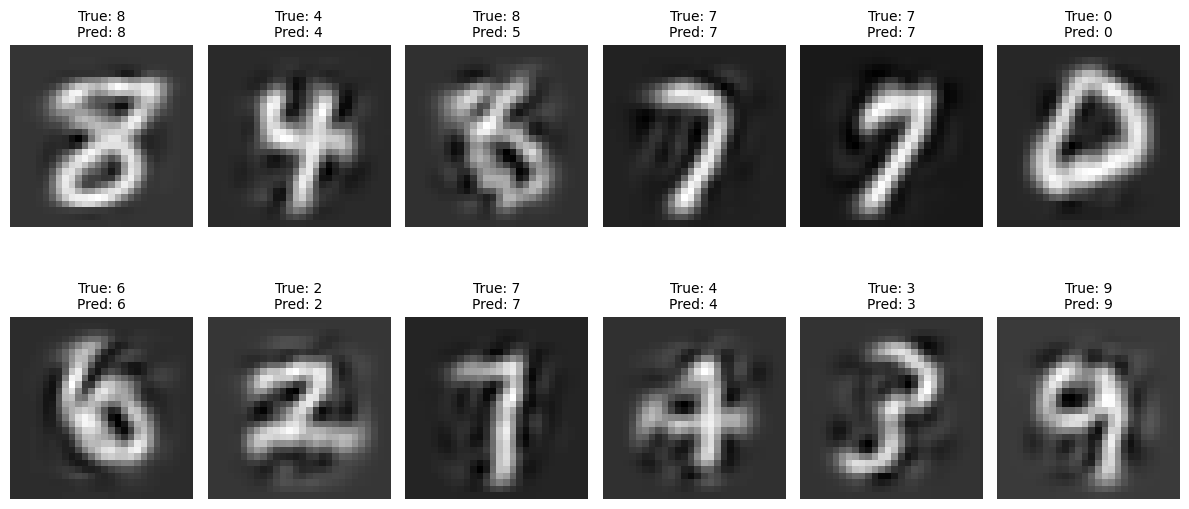

In [20]:
import matplotlib.pyplot as plt

# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test1[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test2)
y_true_samples = y_test1[:n_samples_to_display]
y_pred_samples = y_test_pred_nb[:n_samples_to_display]

# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi
yang didapatkan? Jelaskan!

In [37]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Unduh dataset MNIST
mnist = fetch_openml('mnist_784')

# Bagi dataset menjadi data pelatihan dan pengujian dengan berbagai rasio
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=42)

# Inisialisasi model Naive Bayes dan SVM
nb_model = GaussianNB()
svm_model = SVC()

# Latih model pada data pelatihan
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Prediksi menggunakan model pada data pengujian
y_nb_pred = nb_model.predict(X_test)
y_svm_pred = svm_model.predict(X_test)

# Evaluasi model dengan metrik akurasi
accuracy_nb = accuracy_score(y_test, y_nb_pred)
accuracy_svm = accuracy_score(y_test, y_svm_pred)

# Bandingkan akurasi model Naive Bayes dan SVM
if accuracy_nb > accuracy_svm:
    best_model = "Naive Bayes"
    best_accuracy = accuracy_nb
else:
    best_model = "SVM"
    best_accuracy = accuracy_svm

print("Model terbaik:", best_model)
print("Akurasi model terbaik:", best_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Model terbaik: SVM
Akurasi model terbaik: 0.9762857142857143
